# Pre-processing and Training (Capstone)

Summary: After EDA completion, the resulting dataframe still requires pre-processing procedures; most specifically, normalization and standardization of the datapoints are necessary. 

This includes performing StandardScaler on numerical features to balance each respective feature in the regression models. The procedures below assume a normal distribution for each numerical column, and thus, StandardScaler is performed on each numerical column and normalized to mean 0 and STD 1. 

Of important note: As previously stated, StandardScaler normalizes variables in approximation to a normal distribution. However, the numerical variables in this dataset don't reflect ideal normal distributions. Even with outliers stripped (via the previous EDA process), certain features contain heavy right-skew (kurtosis), and most features don't follow normal distributions at all. In the future (with less personal time constraints), I can experiment with the log of the data (to reduce right-skew of certain features into a normal distribution), or other Pandas/Python distribution scalers, but StandardScaler was performed simply because it is the only method the author of this capstone currently knows, unfortunately...

Furthermore, categorical features are encoded into numerical format for the eventual regression model to compute each category. Thus, pd.get_dummies feature was performed.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('eurobnb_no.csv')

In [4]:
df1 = df.drop('Unnamed: 0', axis=1)

In [5]:
#Just exploring the column names again
df1.columns

Index(['Price', 'Room Type', 'Shared Room', 'Private Room', 'Person Capacity',
       'Superhost?', 'Multi Listing?', 'Biz Listing?', 'cleanliness_rating',
       'guest satis rating', 'bedrooms', 'dist', 'metro_dist', 'attr_index',
       'attr_index_norm', 'Rest Index', 'Rest Index Norm', 'LNG', 'LAT',
       'Weekday/Weekend', 'city', 'GDP (B USD)', 'Country', 'Population',
       'Area in km2 ', 'Pop Density (ppl/km2)', 'GDP per capita'],
      dtype='object')

In [6]:
#Just a cursory overview of the data again
df1.head()

,Price,Room Type,Shared Room,Private Room,Person Capacity,Superhost?,Multi Listing?,Biz Listing?,cleanliness_rating,guest satis rating,bedrooms,dist,metro_dist,attr_index,attr_index_norm,Rest Index,Rest Index Norm,LNG,LAT,Weekday/Weekend,city,GDP (B USD),Country,Population,Area in km2,Pop Density (ppl/km2),GDP per capita
0,129.824479,Entire home/apt,False,False,4.0,False,0,0,10.0,100.0,2,2.813964,0.881890,55.348572,2.086871,78.778377,5.915160,23.76600,37.98300,weekdays,athens,93.7,Greece,664046,2929.0,226.714237,141.104683
1,138.963748,Entire home/apt,False,False,4.0,True,1,0,10.0,96.0,1,0.407293,0.304568,240.306654,9.060559,407.167696,30.572629,23.73168,37.97776,weekdays,athens,93.7,Greece,664046,2929.0,226.714237,141.104683
2,156.304923,Entire home/apt,False,False,3.0,True,0,1,10.0,98.0,1,1.237211,0.288488,199.507366,7.522257,395.967403,29.731642,23.72200,37.97900,weekdays,athens,93.7,Greece,664046,2929.0,226.714237,141.104683
3,91.627024,Entire home/apt,False,False,4.0,True,1,0,10.0,99.0,1,4.367457,0.297467,39.803047,1.500740,58.706578,4.408047,23.72712,38.01435,weekdays,athens,93.7,Greece,664046,2929.0,226.714237,141.104683
4,74.051508,Private room,False,True,2.0,False,0,0,10.0,100.0,1,2.194185,0.385266,78.733405,2.968577,113.325973,8.509204,23.73391,37.99529,weekdays,athens,93.7,Greece,664046,2929.0,226.714237,141.104683


Please ignore the next steps (pairplot) of this capstone. A pairplot was produced simply to obtain a cursory estimate of the effectiveness of the data in producing a viable regression model later on (out of my own curiosity). 

Of note: The pairplot results do not manifest high hopes for a productive machine learning model. 

In [7]:
#Although sns.pairplot isn't directly relevant to this assignment, this pairplot illustrates that there is very little correlation between variables and target
#I don't have high hopes for the machine learning model eventually constructed on top of this data

#sns.pairplot(df1)

Choosing the appropriate scaler method:

Choosing the appropriate scaler method (StandardScaler vs MinMax vs Robust vs others) necessitates understanding the underlying data distribution for each respective numeric feature. Respective histograms are, thus, produced below to glean further info in that respect.

As discerned via the histogram below, no features approximate either a normal nor uniform distribution.

Ultimately, StandardScaler is used for the normalization procedures (simply because it's the only scaler method I currently know how to employ). However, as previously cautioned, StandardScaler will distort the underlying distributions (because StandardScaler assumes normal distribution which does not accurately map the underlying data). It's important to keep note of this scaling distortion. 



array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Person Capacity'}>,
        <AxesSubplot:title={'center':'Multi Listing?'}>,
        <AxesSubplot:title={'center':'Biz Listing?'}>],
       [<AxesSubplot:title={'center':'cleanliness_rating'}>,
        <AxesSubplot:title={'center':'guest satis rating'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'dist'}>],
       [<AxesSubplot:title={'center':'metro_dist'}>,
        <AxesSubplot:title={'center':'attr_index'}>,
        <AxesSubplot:title={'center':'attr_index_norm'}>,
        <AxesSubplot:title={'center':'Rest Index'}>],
       [<AxesSubplot:title={'center':'Rest Index Norm'}>,
        <AxesSubplot:title={'center':'LNG'}>,
        <AxesSubplot:title={'center':'LAT'}>,
        <AxesSubplot:title={'center':'GDP (B USD)'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Area in km2 '}>,
        <AxesSubplot:title={'

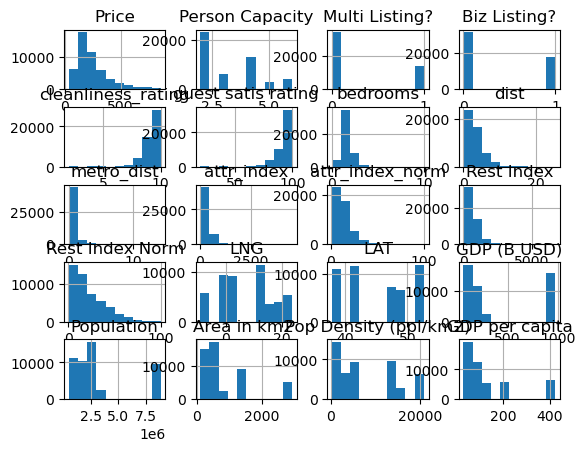

In [8]:
#Based on the histograms below, none of the features follow a normal distribution, nor a uniform distribution
#However, I'm currently only cognizant of the StandardScaler / MinMaxScaler methods to normalize my numeric features
#I know, eventually, applying StandardScaler/MinMaxScaler will further distort the data (since neither norm or uniform distribution models the data)
#Side note: also could have used stats.normaltest() to test for normal distribution

df1.hist()


While surveying my column features for categorical feature conversion into dummy features, I discerned that many features are actually irrelevant/redundant- the subsequent steps cut out these features. 

This following step will reduce the number of features necessary for dummy variables, and simplify the eventual regression models. 

In [9]:
#Note: During EDA, I should have cut out the features LNG, LAT, Area in km2, attr_index_norm, rest index norm - for various reasons / useless 

In [10]:
df2 = df1.drop(['LNG', 'LAT', 'Area in km2 ', 'attr_index_norm', 'Rest Index Norm'], axis=1)
df2.head()

,Price,Room Type,Shared Room,Private Room,Person Capacity,Superhost?,Multi Listing?,Biz Listing?,cleanliness_rating,guest satis rating,bedrooms,dist,metro_dist,attr_index,Rest Index,Weekday/Weekend,city,GDP (B USD),Country,Population,Pop Density (ppl/km2),GDP per capita
0,129.824479,Entire home/apt,False,False,4.0,False,0,0,10.0,100.0,2,2.813964,0.881890,55.348572,78.778377,weekdays,athens,93.7,Greece,664046,226.714237,141.104683
1,138.963748,Entire home/apt,False,False,4.0,True,1,0,10.0,96.0,1,0.407293,0.304568,240.306654,407.167696,weekdays,athens,93.7,Greece,664046,226.714237,141.104683
2,156.304923,Entire home/apt,False,False,3.0,True,0,1,10.0,98.0,1,1.237211,0.288488,199.507366,395.967403,weekdays,athens,93.7,Greece,664046,226.714237,141.104683
3,91.627024,Entire home/apt,False,False,4.0,True,1,0,10.0,99.0,1,4.367457,0.297467,39.803047,58.706578,weekdays,athens,93.7,Greece,664046,226.714237,141.104683
4,74.051508,Private room,False,True,2.0,False,0,0,10.0,100.0,1,2.194185,0.385266,78.733405,113.325973,weekdays,athens,93.7,Greece,664046,226.714237,141.104683


The steps below convert the boolean categories into object categories for the eventual pd.get_dummies stage

In [11]:
#For the below codes, changing relevant categorical columsn into object dtypes (previously they were Booleans)
#This is because pd.get_dummmies (in the next step) can only convert columns with dtypes = object

In [12]:
df2['Shared Room'] = df2['Shared Room'].astype('object')

In [13]:
df2['Private Room'] = df2['Private Room'].astype('object')

In [14]:
df2['Superhost?'] = df2['Superhost?'].astype('object')

In [15]:
df2['Multi Listing?'] = df2['Multi Listing?'].astype('object')

In [16]:
df2['Biz Listing?'] = df2['Biz Listing?'].astype('object')

In [17]:
#Checking to see all the relevant bool categories converted into objects
df2.dtypes

Price                    float64
Room Type                 object
Shared Room               object
Private Room              object
Person Capacity          float64
Superhost?                object
Multi Listing?            object
Biz Listing?              object
cleanliness_rating       float64
guest satis rating       float64
bedrooms                   int64
dist                     float64
metro_dist               float64
attr_index               float64
Rest Index               float64
Weekday/Weekend           object
city                      object
GDP (B USD)              float64
Country                   object
Population                 int64
Pop Density (ppl/km2)    float64
GDP per capita           float64
dtype: object


The below steps convert the categorial features into numerically encoded features. 

The first columns are dropped to reduce dimensionality, because these first columns are redundant. 

I also set dtype = int, although this step isn't necessary. 

In [18]:
#Creating dummy variables with pd.get_dummies
#Dropping first columns to reduce dimensionality with drop_first=True
#Setting dtype=int to output columns as 0 vs 1, instead of Booleans (False vs True)

df3 = pd.get_dummies(df2, drop_first=True, dtype=int)
df3.head()

,Price,Person Capacity,cleanliness_rating,guest satis rating,bedrooms,dist,metro_dist,attr_index,Rest Index,GDP (B USD),Population,Pop Density (ppl/km2),GDP per capita,Room Type_Private room,Room Type_Shared room,Shared Room_True,Private Room_True,Superhost?_True,Multi Listing?_1,Biz Listing?_1,Weekday/Weekend_weekends,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,Country_England,Country_France,Country_Germany,Country_Greece,Country_Hungary,Country_Italy,Country_Portugal,Country_Spain
0,129.824479,4.0,10.0,100.0,2,2.813964,0.881890,55.348572,78.778377,93.7,664046,226.714237,141.104683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,138.963748,4.0,10.0,96.0,1,0.407293,0.304568,240.306654,407.167696,93.7,664046,226.714237,141.104683,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,156.304923,3.0,10.0,98.0,1,1.237211,0.288488,199.507366,395.967403,93.7,664046,226.714237,141.104683,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,91.627024,4.0,10.0,99.0,1,4.367457,0.297467,39.803047,58.706578,93.7,664046,226.714237,141.104683,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,74.051508,2.0,10.0,100.0,1,2.194185,0.385266,78.733405,113.325973,93.7,664046,226.714237,141.104683,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [19]:
df3.columns

Index(['Price', 'Person Capacity', 'cleanliness_rating', 'guest satis rating',
       'bedrooms', 'dist', 'metro_dist', 'attr_index', 'Rest Index',
       'GDP (B USD)', 'Population', 'Pop Density (ppl/km2)', 'GDP per capita',
       'Room Type_Private room', 'Room Type_Shared room', 'Shared Room_True',
       'Private Room_True', 'Superhost?_True', 'Multi Listing?_1',
       'Biz Listing?_1', 'Weekday/Weekend_weekends', 'city_barcelona',
       'city_berlin', 'city_budapest', 'city_lisbon', 'city_london',
       'city_paris', 'city_rome', 'city_vienna', 'Country_England',
       'Country_France', 'Country_Germany', 'Country_Greece',
       'Country_Hungary', 'Country_Italy', 'Country_Portugal',
       'Country_Spain'],
      dtype='object')

In [20]:
#Creating X and Y variables for train_test_split
X = df3.drop('Price', axis=1)
y = df3['Price']

In [21]:
#persisting this dataframe for future reference, please ignore for now
#df3.to_csv('df3.csv')

In [22]:
#Creating train-test-split datasets
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [23]:
#Fitting and transforming StandardScaler to X_train
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)

In [24]:
#For later use - Transforming x_test based on fitted x_train
x_test_scaled = scaler.transform(x_test)

In [25]:
y_train

32058    287.305434
9562     134.617182
7080     119.161217
24470    167.924928
38021     87.438337
            ...    
11284    100.813085
44732    171.135997
38158    156.874664
860      115.998406
15795     91.697936
Name: Price, Length: 38941, dtype: float64

Persisting the below DFs into CSVs for future use in the Machine Learning models

In [26]:
x_train.to_csv('x_train.csv')

In [27]:
x_test.to_csv('x_test.csv')

In [28]:
y_train.to_csv('y_train.csv')

In [29]:
y_test.to_csv('y_test.csv')

In [34]:
df3.to_csv('df3.csv')